<a href="https://colab.research.google.com/github/nawaz-kmr/Amazon-Food-Reviews-Sentiment-Analysis/blob/main/Amazon_Fine_Food_Reviews_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read the dataset

In [2]:
data = pd.read_csv('Reviews.csv')
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


# **Data**


**About Dataset**
Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

**Number of reviews**: 568,454

**Number of users**: 256,059

**Number of products**: 74,258

**Timespan**: Oct 1999 - Oct 2012

**Number of Attributes/Columns** in data: 10

### #**Attribute Information:**
**Id**

**ProductId** - unique identifier for the product

**UserId** - unqiue identifier for the user

**ProfileName**

**HelpfulnessNumerator** - number of users who found the review helpful

**HelpfulnessDenominator** - number of users who indicated whether they found the * review helpful or not

**Score** - rating between 1 and 5

**Time** - timestamp for the review

**Summary** - brief summary of the review

**Text** - text of the review

In [3]:
#let's get little glimpse of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


# **Exploratory data Analysis**


Analyisis of **ProductId**

In [4]:
# Number of unique products in the dataset
data.ProductId.nunique()

74258

In [5]:
#lets check the frequency/ count of the products
product_freq = pd.DataFrame(data.ProductId.value_counts())
product_freq

,ProductId
B007JFMH8M,913
B0026RQTGE,632
B002QWHJOU,632
B002QWP89S,632
B002QWP8H0,632
...,...
B004DSPTTM,1
B008C9QWU8,1
B007O5A6BM,1
B003Q4TZ08,1


In [6]:
#No of products having 1-10 Review  / i,e less than 10
top10 = []
for i in range(1,11):
  x = product_freq[product_freq['ProductId']==i].count()# i == review
  print('{} No of products having {} Review'.format(int(x),i))
  top10.append(int(x))
print('Total number of products having 1-10 reviews {}'.format(sum(top10)))

30408 No of products having 1 Review
12262 No of products having 2 Review
6849 No of products having 3 Review
4324 No of products having 4 Review
3105 No of products having 5 Review
2237 No of products having 6 Review
1841 No of products having 7 Review
1424 No of products having 8 Review
1189 No of products having 9 Review
1001 No of products having 10 Review
Total number of products having 1-10 reviews 64640


That means out of **74258** products, **64640**products have 1-10 reviews. 

**9618** products have more than 10 reviews

Analyisis of **UserId**

In [7]:
#Unique number of users in the dataset
data.UserId.nunique()

256059

In [8]:
# frequency
data.UserId.value_counts()

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2O8OFVSTO9PF3      1
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [9]:
# top 10 frquent users 
data.UserId.value_counts()[:10]

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: UserId, dtype: int64

In [10]:
# Cross check for this user 
data[data['UserId']=='AQQLWCMRNDFGI']['Text'].isna().sum()

0

In [11]:
# Cross check for this user 
data[data['UserId']=='AQQLWCMRNDFGI']['Summary'].isna().sum()

0

Analysis of **Score** Feature

In [12]:
# Unique values of Score
data.Score.unique()


array([5, 1, 4, 2, 3], dtype=int64)

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

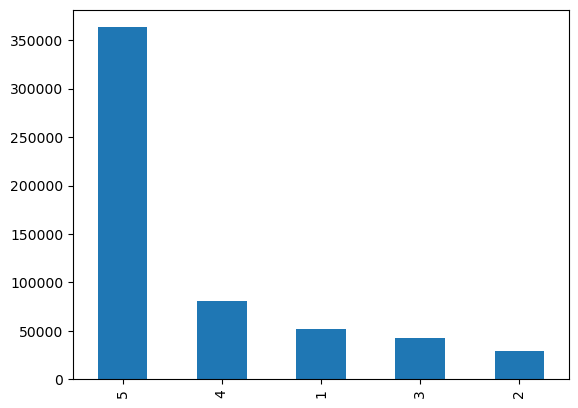

In [13]:
# distibution of score 
data.Score.value_counts().plot(kind='bar')
data.Score.value_counts()

This shows this dataset is highly imbalanced, most of the star raing is 5*

Analysis of **Summary** Feature

In [14]:
data.Summary[0:10]

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: Summary, dtype: object

In [15]:
data.Summary.count()

568427

In [16]:
#null values
data.Summary.isna().sum()

27

In [17]:
#test does't have null values
data.Text.isna().sum()

0

In [18]:
# description of summary data
data['Summary'].dropna().str.split().apply(len).describe(percentiles=[0.1,0.25,0.5,0.75,0.95])

count    568427.000000
mean          4.113297
std           2.597313
min           1.000000
10%           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
95%           9.000000
max          42.000000
Name: Summary, dtype: float64

In [19]:
# most frequent summary text 
data.Summary.value_counts()[:50]

Delicious!           2462
Delicious            2316
Yummy!               1594
Yummy                1268
Great product        1091
Yum!                 1081
Excellent             985
Great Product         910
Love it!              910
Great                 749
Great!                748
Tasty                 645
Yum                   618
Disappointed          587
Excellent!            573
Great Coffee          558
Awesome!              550
Awesome               546
Good stuff            515
yummy                 512
great product         476
Great product!        474
Good Stuff            472
Great coffee          459
Love it               444
delicious             431
YUM!                  429
Good                  406
The Best              404
Very good             400
Amazing               378
great                 368
Wonderful             365
Amazing!              345
Tasty!                344
Excellent product     340
Great Tea             339
Wonderful!            335
Great taste 

Analysis of **Text** Variable

In [20]:
# description of text column data
data.Text.str.split().apply(len).describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.99])

count    568454.000000
mean         80.264023
std          79.455384
min           3.000000
10%          24.000000
25%          33.000000
50%          56.000000
75%          98.000000
95%         218.000000
99%         388.000000
max        3432.000000
Name: Text, dtype: float64

In [21]:
# data[data.Text.str.split().apply(len) >512]['Text'].str.split().apply(len).sort_values(ascending=False)

In [22]:
#check for duplicated
data[data.Text.duplicated()].Text

29        I don't know if it's the cactus or the tequila...
574       I'm addicted to salty and tangy flavors, so wh...
603       I'm addicted to salty and tangy flavors, so wh...
1973      The pork chops from Omaha Steaks were very tas...
2309      Too much of the white pith on this orange peel...
                                ...                        
568409    I was very pleased with the ingredient quality...
568410    My main reason for the five star review has to...
568411    I bought this to try on two registered Maine C...
568412    When we brought home two 3-month-old purebred ...
568413    My cats don't like it. what else can I say to ...
Name: Text, Length: 174875, dtype: object

In [23]:
# data.Text.value_counts()

In [24]:
# lets clean the test field 
data['CleanText'] = data['Text'].str.replace('<br />','')
data['CleanText'] = data['CleanText'].str.replace('</a>','')

In [25]:
data.CleanText.str.split().apply(len).describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.99])

count    568454.000000
mean         79.125704
std          77.375592
min           3.000000
10%          24.000000
25%          33.000000
50%          56.000000
75%          97.000000
95%         214.000000
99%         379.000000
max        3377.000000
Name: CleanText, dtype: float64

In [26]:
data[data.CleanText.str.split().apply(len) > 512].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 528 to 568249
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      2051 non-null   int64 
 1   ProductId               2051 non-null   object
 2   UserId                  2051 non-null   object
 3   ProfileName             2051 non-null   object
 4   HelpfulnessNumerator    2051 non-null   int64 
 5   HelpfulnessDenominator  2051 non-null   int64 
 6   Score                   2051 non-null   int64 
 7   Time                    2051 non-null   int64 
 8   Summary                 2051 non-null   object
 9   Text                    2051 non-null   object
 10  CleanText               2051 non-null   object
dtypes: int64(5), object(6)
memory usage: 192.3+ KB


**2051** Entries have more than **512 context length** with **max=3377** out of **568454** samples

and the **data.CleanText** has  **mean = 80**

In [27]:
from wordcloud import WordCloud

In [28]:
# wordc = WordCloud().generate(data.Summary.str.split().to_string())

In [29]:
# plt.imshow(wordc)
# plt.show()

# **feature engineering**

In [30]:
#create new variable and map scores to categorical label
data['Sentiment'] = data.Score.map({1:'Negative',2:'Negative',3:'Neutral',4:'Positive',5:'Positive'})

In [31]:
data.Sentiment.value_counts()

Positive    443777
Negative     82037
Neutral      42640
Name: Sentiment, dtype: int64

In [32]:
#encode sentiments
data['EnSentiment'] = data.Sentiment.map({'Negative':0,'Neutral':1,'Positive':2})

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
 10  CleanText               568454 non-null  object
 11  Sentiment               568454 non-null  object
 12  EnSentiment             568454 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 56.4+ MB


In [34]:
# # Summary sentiment 
# positive_word = data[data['EnSentiment']==1]['Summary'].str.split().to_string() 

In [35]:
# plt.imshow(WordCloud().generate(positive_word))

In [36]:
# negative_word = data[data['EnSentiment']==-1]['Summary'].str.split().to_string()
# plt.imshow(WordCloud().generate(negative_word))

In [37]:
# neutral_word = data[data['EnSentiment']==0]['Summary'].str.split().to_string()
# plt.imshow(WordCloud().generate(neutral_word))

# **Splitting the data **

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#feature selection 
data.drop(columns=['Id','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time'],inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductId    568454 non-null  object
 1   UserId       568454 non-null  object
 2   Score        568454 non-null  int64 
 3   Summary      568427 non-null  object
 4   Text         568454 non-null  object
 5   CleanText    568454 non-null  object
 6   Sentiment    568454 non-null  object
 7   EnSentiment  568454 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 34.7+ MB


In [41]:
data.isna().sum()

ProductId       0
UserId          0
Score           0
Summary        27
Text            0
CleanText       0
Sentiment       0
EnSentiment     0
dtype: int64

Here we replaced **empty Summary** with **.**dot

In [42]:
# fill the missing value 
data.Summary.fillna(value='.',inplace=True)

In [43]:
data.isna().sum()

ProductId      0
UserId         0
Score          0
Summary        0
Text           0
CleanText      0
Sentiment      0
EnSentiment    0
dtype: int64

In [44]:
from tensorflow.keras.utils import to_categorical

In [45]:
#split the data for model training
X_train, X_test, y_train, y_test = train_test_split(data.Summary, to_categorical(data.EnSentiment), test_size=0.1, random_state=42)

In [46]:
X_train.shape,X_test.shape

((511608,), (56846,))

In [47]:
y_train.shape

(511608, 3)

In [48]:
y_test.shape

(56846, 3)

# **Model Selection**

## **BOW**

In [49]:

# Creating Bag of Word
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
vectorizer = CountVectorizer()
train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)

In [51]:
# we get the embedding of the words
test_matrix.shape,train_matrix.shape

((56846, 32078), (511608, 32078))

In [52]:
vectorizer.get_feature_names_out().shape

(32078,)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [54]:
# lets train and test the logistic model on BOW representation
from sklearn.multiclass import OneVsRestClassifier
lr = OneVsRestClassifier(LogisticRegression(solver='saga',max_iter=500,n_jobs=-1))
lr.fit(train_matrix,y_train)
y_pred = lr.predict(test_matrix)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.58      0.65      8083
           1       0.59      0.17      0.26      4267
           2       0.91      0.96      0.93     44496

   micro avg       0.89      0.84      0.86     56846
   macro avg       0.75      0.57      0.62     56846
weighted avg       0.87      0.84      0.84     56846
 samples avg       0.84      0.84      0.84     56846



C:\Users\sohel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
lr.classes_

array([0, 1, 2])

In [56]:
lr.coef_

C:\Users\sohel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)


array([[ 0.67441714, -0.10072553, -0.16171388, ..., -0.38834618,
         0.58051934, -0.12253484],
       [ 0.20170368, -0.46463595, -0.04795167, ..., -0.20255071,
        -0.06448365, -0.06581619],
       [-0.69982187,  0.26154976,  0.18340181, ...,  0.54803484,
        -0.51361155,  0.18948989]])

In [57]:
lr.get_params()

{'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 500,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': -1,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'saga',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=500, n_jobs=-1, solver='saga'),
 'n_jobs': None}

In [58]:
lr.score(test_matrix,y_test)

0.8389156668894909

Feature scaling

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler(with_mean=False,with_std=False)

In [61]:
X_train_scaled = scaler.fit_transform(train_matrix)
X_test_scaled = scaler.transform(test_matrix)

In [62]:
# lets train and test the logistic model on BOW representation
from sklearn.multiclass import OneVsRestClassifier
lr = OneVsRestClassifier(LogisticRegression(solver='saga',max_iter=500,n_jobs=-1))
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.58      0.65      8083
           1       0.59      0.17      0.26      4267
           2       0.91      0.96      0.93     44496

   micro avg       0.89      0.84      0.86     56846
   macro avg       0.75      0.57      0.62     56846
weighted avg       0.87      0.84      0.84     56846
 samples avg       0.84      0.84      0.84     56846



C:\Users\sohel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Tfidf**

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
#implement tfidf 
vectorizer = TfidfVectorizer()
train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)
test_matrix.shape,train_matrix.shape

((56846, 32078), (511608, 32078))

In [65]:
vectorizer.get_feature_names_out().shape

(32078,)

In [66]:
from sklearn.multiclass import OneVsRestClassifier
lr = OneVsRestClassifier(LogisticRegression(solver='saga',max_iter=500,n_jobs=-1))
lr.fit(train_matrix,y_train)
y_pred = lr.predict(test_matrix)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.57      0.65      8083
           1       0.57      0.14      0.22      4267
           2       0.91      0.96      0.93     44496

   micro avg       0.89      0.84      0.86     56846
   macro avg       0.75      0.55      0.60     56846
weighted avg       0.87      0.84      0.84     56846
 samples avg       0.84      0.84      0.84     56846



C:\Users\sohel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Word2vec**

In [67]:
from gensim.models import Word2Vec

In [70]:
from gensim.models import Word2Vec

doc = [x.split() for x in data.Summary.values]
model = Word2Vec(doc, vector_size=50, workers=4, min_count=1)


In [72]:
w2v_words = list(model.wv.index_to_key)  # Get the list of vocabulary words


In [73]:
len(w2v_words)

104044

In [74]:
X_test.shape

(56846,)

In [75]:
import numpy as np
def embd():
  x = np.zeros((X_train.shape[0],50))
  for i,doc in enumerate(X_train.values):
    x[i,:] = np.average(model.wv[doc.split()],axis=0)
  return x

vec_train = embd()

In [76]:
vec_train.shape

(511608, 50)

In [77]:
def embd():
  x = np.zeros((X_test.shape[0],50))
  for i,doc in enumerate(X_test.values):
    x[i,:] = np.average(model.wv[doc.split()],axis=0)
  return x
vec_test = embd()

In [78]:
vec_test.shape

(56846, 50)

In [79]:
from sklearn.multiclass import OneVsRestClassifier
lr = OneVsRestClassifier(LogisticRegression(solver='saga',max_iter=500,n_jobs=-1))
lr.fit(vec_train,y_train)
y_pred = lr.predict(vec_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.16      0.25      8083
           1       0.47      0.04      0.08      4267
           2       0.84      0.95      0.89     44496

   micro avg       0.82      0.77      0.80     56846
   macro avg       0.62      0.38      0.41     56846
weighted avg       0.77      0.77      0.74     56846
 samples avg       0.77      0.77      0.77     56846



C:\Users\sohel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Deeplearning part**


In [80]:
data.head(2)

,ProductId,UserId,Score,Summary,Text,CleanText,Sentiment,EnSentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,Positive,2
1,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,Negative,0


In [81]:
from tensorflow.keras.layers import Dense,LSTM, Bidirectional,Embedding,Dropout,GlobalMaxPool1D,Flatten

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [83]:
# create tokenizer
vocab = 30000
tokenizer = Tokenizer(num_words = vocab, oov_token='unk',lower=False)

In [84]:
X_train

100903                This is exactly as advertised
160578                                  Great Value
72806                    Prune Rocks (as in stones)
465217                      delicious hot chocolate
80933     Delicious.  Never buy Pepperoni in a bag!
                            ...                    
110268                              funnel cake mix
259178                           Yummy Fruit Snacks
365838                                 Great coffee
131932                   Earl Grey of Earl Grey +++
121958          Excellent Quality; my dogs LOVE it!
Name: Summary, Length: 511608, dtype: object

In [85]:
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train.values)

In [86]:
train_padded = pad_sequences(train_sequences, padding='post', maxlen=42)

In [87]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=42)

In [88]:
test_padded

array([[  429,     8,   168, ...,     0,     0,     0],
       [   12,  1031,   109, ...,     0,     0,     0],
       [  575,   746,     0, ...,     0,     0,     0],
       ...,
       [  277, 21061, 16677, ...,     0,     0,     0],
       [ 9130, 18211,   264, ...,     0,     0,     0],
       [   19,    74,    13, ...,     0,     0,     0]])

In [89]:
model = Sequential([
    Embedding(input_dim = vocab,output_dim = 50, input_length = 42),
    Bidirectional(LSTM(128)),
    Dense(128,activation = 'relu'),
    Dropout(0.1),
    Dense(64,activation='relu'),
    Dense(3,activation='softmax')
])
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 42, 50)            1500000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              183296    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [90]:
history = model.fit(train_padded,y_train,
          epochs = 10,
          batch_size=256,
          validation_split =0.1)

Epoch 1/10
1799/1799 [==============================] - 324s 178ms/step - loss: 0.3847 - accuracy: 0.8595 - val_loss: 0.3244 - val_accuracy: 0.8816
Epoch 2/10
1799/1799 [==============================] - 357s 198ms/step - loss: 0.2975 - accuracy: 0.8911 - val_loss: 0.3046 - val_accuracy: 0.8918
Epoch 3/10
1799/1799 [==============================] - 365s 203ms/step - loss: 0.2606 - accuracy: 0.9054 - val_loss: 0.3043 - val_accuracy: 0.8936
Epoch 4/10
1799/1799 [==============================] - 292s 162ms/step - loss: 0.2340 - accuracy: 0.9152 - val_loss: 0.3083 - val_accuracy: 0.8931
Epoch 5/10
1799/1799 [==============================] - 346s 192ms/step - loss: 0.2129 - accuracy: 0.9228 - val_loss: 0.3148 - val_accuracy: 0.8978
Epoch 6/10
1799/1799 [==============================] - 327s 182ms/step - loss: 0.1953 - accuracy: 0.9292 - val_loss: 0.3306 - val_accuracy: 0.8978
Epoch 7/10
1799/1799 [==============================] - 319s 177ms/step - loss: 0.1807 - accuracy: 0.9343 - val_

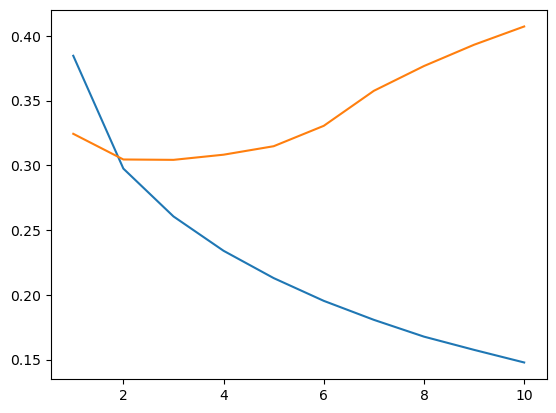

In [91]:
plt.plot(range(1, len(history.history['loss']) + 1),history.history['loss'])
plt.plot(range(1, len(history.history['loss']) + 1),history.history['val_loss'])


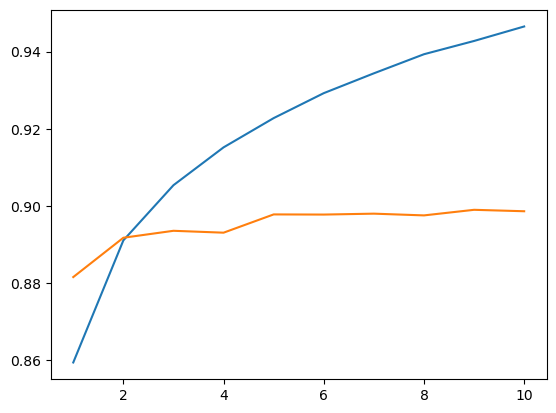

In [92]:
plt.plot(range(1, len(history.history['loss']) + 1),history.history['accuracy'])
plt.plot(range(1, len(history.history['loss']) + 1),history.history['val_accuracy'])

## Transformers

**1.BERT**

In [93]:
!pip install transformers
# import transformers
from transformers import AutoTokenizer,TFBertModel


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


RuntimeError: Failed to import transformers.models.bert.modeling_tf_bert because of the following error (look up to see its traceback):
No module named 'keras.saving.hdf5_format'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

In [ ]:
# Before training, we need to convert the input textual data into BERT’s input data format using a tokenizer.
x_train = tokenizer(text=X_train.tolist(),
                    add_special_tokens=True,
                    max_length= 42,
                    truncation= True,
                    padding=True,
                    return_tensors='tf',
                    return_token_type_ids= False,
                    return_attention_mask= True,
                    verbose=True
                   )
x_test = tokenizer(text=X_test.tolist(),
                    add_special_tokens=True,
                    max_length= 42,
                    truncation= True,
                    padding=True,
                    return_tensors='tf',
                    return_token_type_ids= False,
                    return_attention_mask= True,
                    verbose=True
                   )

In [ ]:
x_train

In [ ]:
x_test.input_ids

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras import Model

In [ ]:
max_len = 42
input_ids = Input(shape=(max_len,),dtype='int32' ,name="input_ids")
input_mask = Input(shape=(max_len,), dtype ='int32', name="attention_mask")
embedding = bert(input_ids, attention_mask=input_mask)[0] #return only last hidden state -->it is at 0 index of bert output
out = GlobalMaxPool1D()(embedding)
out = Dense(128, activation = 'relu')(out)
out = Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(3, activation = 'softmax')(out)
model = Model(inputs = [input_ids,input_mask],outputs=y)
model.layers[2].trainable =False

In [ ]:
model.summary()

In [ ]:
# Model Training
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x = [x_train['input_ids'], x_train['attention_mask']],
                   y = y_train,
                   validation_split =0.1,
                    epochs = 2,
                    batch_size = 256)

In [ ]:
# fine tunning

max_len = 42
input_ids = Input(shape=(max_len,),dtype='int32' ,name="input_ids")
input_mask = Input(shape=(max_len,), dtype ='int32', name="attention_mask")
embedding = bert(input_ids, attention_mask=input_mask)[0] #return only last hidden state -->it is at 0 index of bert output
out = GlobalMaxPool1D()(embedding)
out = Dense(128, activation = 'relu')(out)
out = Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(3, activation = 'softmax')(out)
model = Model(inputs = [input_ids,input_mask],outputs=y)
model.layers[2].trainable =True
# Model Training
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x = [x_train['input_ids'], x_train['attention_mask']],
                   y = y_train,
                   validation_split =0.1,
                    epochs = 2,
                    batch_size = 256)